<a href="https://colab.research.google.com/github/RichardTwit/App_Project_SpringBoard/blob/main/Suicide__Data_Model_Making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Suicide_Detection.csv')
df=df[:20000]
df.head()


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
df.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [ ]:
 import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')




# Function to remove punctuation from a sentence
def remove_punctuation(sentence):
    return sentence.translate(str.maketrans('', '', string.punctuation))

# Function to remove stop words from a sentence
def remove_stop_words(sentence):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in word_tokenize(sentence) if word.lower() not in stop_words])

# Remove punctuation and stop words from sentences
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(remove_stop_words)

# Tokenize the sentences into words
df['Tokenized_Sentence'] = df['text'].apply(word_tokenize)

# Train a Word2Vec model on the tokenized sentences to get word embeddings
word2vec_model = Word2Vec(sentences=df['Tokenized_Sentence'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get the sentence embeddings
def get_sentence_embedding(sentence_tokens):
    embeddings = []
    for token in sentence_tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

# Apply the function to get sentence embeddings
df['Sentence_Embedding'] = df['Tokenized_Sentence'].apply(get_sentence_embedding)

# Drop the intermediate Tokenized_Sentence column
df.drop('Tokenized_Sentence', axis=1, inplace=True)

print(df)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


       Unnamed: 0                                               text  \
0               2  Ex Wife Threatening SuicideRecently left wife ...   
1               3  weird dont get affected compliments coming som...   
2               4  Finally 2020 almost never hear 2020 bad year e...   
3               8                  need helpjust help im crying hard   
4               9  ’ lostHello name Adam 16 ’ struggling years ’ ...   
...           ...                                                ...   
19995       30118  wish wasnt like thisI read lot posts today com...   
19996       30119  Future druggieWhy see reason live get high fun...   
19997       30121  tried kill HelpI tried kill sat plastic bag ta...   
19998       30122  Someone downvoted post piece shit boyfriend co...   
19999       30123  Heres question straight guy dates gay trans gu...   

             class                                 Sentence_Embedding  
0          suicide  [0.5475077, 0.67897713, -0.9247983, -0.0149

In [ ]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Flatten the sentence embeddings to create numeric features for the random forest
df_features = pd.DataFrame(df['Sentence_Embedding'].tolist())
# Perform one-hot encoding on the 'Category' column
df['class_num'] = df['class'].map({'non-suicide': 0, 'suicide': 1})
df = pd.concat([df['text'], df_features, df['class'],df['class_num']], axis=1)

# Convert all column names to strings
df.columns = df.columns.astype(str)




In [ ]:
df.columns

Index(['text', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '92', '93', '94', '95', '96', '97', '98', '99', 'class', 'class_num'],
      dtype='object', length=103)

In [ ]:
df['class_num']

0        1
1        0
2        0
3        1
4        1
        ..
19995    1
19996    1
19997    1
19998    1
19999    0
Name: class_num, Length: 20000, dtype: int64

In [ ]:
# Split the data into training and testing sets
X = df.drop(['class','text','class_num'], axis=1)
y = df['class_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df.head()

,text,0,1,2,3,4,5,6,7,8,...,92,93,94,95,96,97,98,99,class,class_num
0,Ex Wife Threatening SuicideRecently left wife ...,0.547508,0.678977,-0.924798,-0.014910,-0.694471,0.886496,0.759685,-0.054074,0.841289,...,-0.027972,0.380698,-0.070407,0.450648,0.685831,0.554937,-0.396822,0.051728,suicide,1
1,weird dont get affected compliments coming som...,0.521822,0.699993,-1.271188,-0.173078,-0.782226,0.615712,1.066175,0.081854,0.883252,...,0.015948,0.187470,-0.165335,0.660745,0.660157,0.580808,-0.297537,0.053221,non-suicide,0
2,Finally 2020 almost never hear 2020 bad year e...,0.987056,0.639975,-0.830451,-0.067391,-0.763360,0.979100,0.653982,-0.215553,0.942297,...,0.391298,-0.001421,0.078057,0.493873,0.671401,0.423943,-0.521464,-0.098031,non-suicide,0
3,need helpjust help im crying hard,0.144628,0.618702,-1.066362,-0.198570,-0.492481,0.620094,0.901947,0.217764,0.306896,...,-0.236826,1.005566,-0.089133,0.498891,0.708650,0.410003,-0.095260,0.423281,suicide,1
4,’ lostHello name Adam 16 ’ struggling years ’ ...,0.639282,0.416923,-0.749200,0.001047,-0.967098,1.002171,0.718106,0.004885,0.537117,...,-0.097442,0.314365,0.111787,0.262566,0.725509,0.290757,-0.349866,0.316326,suicide,1


In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.547508,0.678977,-0.924798,-0.014910,-0.694471,0.886496,0.759685,-0.054074,0.841289,0.300453,...,-0.637330,-0.290925,-0.027972,0.380698,-0.070407,0.450648,0.685831,0.554937,-0.396822,0.051728
1,0.521822,0.699993,-1.271188,-0.173078,-0.782226,0.615712,1.066175,0.081854,0.883252,0.058087,...,-0.614073,-0.112211,0.015948,0.187470,-0.165335,0.660745,0.660157,0.580808,-0.297537,0.053221
2,0.987056,0.639975,-0.830451,-0.067391,-0.763360,0.979100,0.653982,-0.215553,0.942297,0.353707,...,-0.302101,-0.137848,0.391298,-0.001421,0.078057,0.493873,0.671401,0.423943,-0.521464,-0.098031
3,0.144628,0.618702,-1.066362,-0.198570,-0.492481,0.620094,0.901947,0.217764,0.306896,0.051639,...,-0.642516,-0.445658,-0.236826,1.005566,-0.089133,0.498891,0.708650,0.410003,-0.095260,0.423281
4,0.639282,0.416923,-0.749200,0.001047,-0.967098,1.002171,0.718106,0.004885,0.537117,0.535290,...,-0.600562,0.012233,-0.097442,0.314365,0.111787,0.262566,0.725509,0.290757,-0.349866,0.316326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.559945,0.865852,-1.130912,-0.085667,-0.717467,0.853635,0.827655,-0.015193,0.965543,0.200479,...,-0.615005,-0.398126,-0.109721,0.314356,-0.005511,0.468166,0.563862,0.559274,-0.515562,-0.022385
19996,0.613716,0.940806,-1.062011,0.045833,-0.495146,0.953397,0.797257,-0.041463,0.729816,0.308965,...,-0.362983,-0.298651,0.239876,0.116610,-0.311306,0.583285,0.610962,0.654669,-0.434846,0.047273
19997,0.330455,0.394379,-0.877999,-0.313064,-0.768178,0.902169,0.452729,0.455780,0.371314,0.204433,...,-0.702000,0.012459,-0.287992,0.943554,0.000706,0.405628,0.419867,0.308303,-0.252124,-0.003133
19998,0.866507,0.997707,-1.077806,-0.166320,-0.426135,0.395896,0.479204,-0.093862,0.665018,0.253936,...,-0.532347,-0.379927,-0.157648,0.224586,0.095398,0.553564,0.311351,0.639729,-0.668864,0.000678


In [ ]:
y

0        1
1        0
2        0
3        1
4        1
        ..
19995    1
19996    1
19997    1
19998    1
19999    0
Name: class_num, Length: 20000, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.89575
Precision: 0.9023109243697479
Recall: 0.8814776808619805
F1 Score: 0.8917726446924474
Confusion Matrix:
[[1865  186]
 [ 231 1718]]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
logistic_reg = LogisticRegression()

# Train the model on the training data
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.88625
Precision: 0.8720119521912351
Recall: 0.8984094407388404
F1 Score: 0.8850138994187516
Confusion Matrix:
[[1794  257]
 [ 198 1751]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC

# Create the SVM classifier
svm_classifier = SVC()

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.90225
Precision: 0.8934343434343435
Recall: 0.9076449461262186
F1 Score: 0.9004835836090609
Confusion Matrix:
[[1840  211]
 [ 180 1769]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8145
Precision: 0.8040302267002519
Recall: 0.818881477680862
F1 Score: 0.8113879003558718
Confusion Matrix:
[[1662  389]
 [ 353 1596]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


# Create the GBM classifier
gbm_classifier = GradientBoostingClassifier()

# Train the model on the training data
gbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.89325
Precision: 0.8862944162436548
Recall: 0.8958440225756799
F1 Score: 0.8910436335799948
Confusion Matrix:
[[1827  224]
 [ 203 1746]]


In [ ]:
from sklearn.naive_bayes import GaussianNB


# Create the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Train the model on the training data
gnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8375
Precision: 0.7961696306429549
Recall: 0.8958440225756799
F1 Score: 0.8430709802028006
Confusion Matrix:
[[1604  447]
 [ 203 1746]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model on the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model with the tuned hyperparameters
best_dt_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_dtc = best_dt_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_dtc)
print("Precision:", precision_dtc)
print("Recall:", recall_dtc)
print("F1 Score:", f1_dtc)
print("Confusion Matrix:")
print(conf_matrix_dtc)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.849
Precision: 0.8337468982630273
Recall: 0.8619805028219599
F1 Score: 0.8476286579212916
Confusion Matrix:
[[1716  335]
 [ 269 1680]]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression classifier
logistic_reg = LogisticRegression()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'penalty': ['l1', 'l2'],   # Regularization type
    'C': [0.01, 0.1, 1.0, 10.0],   # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model on the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model with the tuned hyperparameters
best_logistic_reg = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_lr = best_logistic_reg.predict(X_test)

# Evaluate the model's performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.883
Precision: 0.8689586447433981
Recall: 0.8948178553104156
F1 Score: 0.8816986855409504
Confusion Matrix:
[[1788  263]
 [ 205 1744]]


In [ ]:
from sklearn.svm import SVC


# Create the SVM classifier
svm_classifier = SVC()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.1, 1, 10],       # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly']   # Kernel type
}

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model on the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model with the tuned hyperparameters
best_svm_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_svc = best_svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1 Score:", f1_svc)
print("Confusion Matrix:")
print(conf_matrix_svc)


Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.90575
Precision: 0.898984771573604
Recall: 0.9086711133914828
F1 Score: 0.9038019903036488
Confusion Matrix:
[[1852  199]
 [ 178 1771]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50],
    'max_depth': [3]
}

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model on the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model with the tuned hyperparameters
best_gbm_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_gbc = best_gbm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_gbc)
print("Precision:", precision_gbc)
print("Recall:", recall_gbc)
print("F1 Score:", f1_gbc)
print("Confusion Matrix:")
print(conf_matrix_gbc)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.888
Precision: 0.8765679879578525
Recall: 0.896357106208312
F1 Score: 0.8863521055301877
Confusion Matrix:
[[1805  246]
 [ 202 1747]]


In [ ]:
from sklearn.naive_bayes import GaussianNB


# Assuming X_train, X_test, y_train, and y_test are defined before this point.

# Create the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Define hyperparameters and their possible values for the grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-7, 1e-5, 1e-3, 1e-1],  # Example values for var_smoothing
    'priors': [None, [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]  # Example values for priors
}

# Create GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(gnb_classifier, param_grid, cv=5, n_jobs=-1)

# Train the model on the training data and perform grid search for hyperparameters
grid_search.fit(X_train, y_train)

# Get the best Gaussian Naive Bayes model from the grid search
best_gnb_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_gnb = best_gnb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

# Print the performance metrics, best hyperparameters, and confusion matrix
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_gnb)
print("Precision:", precision_gnb)
print("Recall:", recall_gnb)
print("F1 Score:", f1_gnb)
print("Confusion Matrix:")
print(conf_matrix_gnb)


Best hyperparameters: {'priors': None, 'var_smoothing': 1e-09}
Accuracy: 0.8375
Precision: 0.7961696306429549
Recall: 0.8958440225756799
F1 Score: 0.8430709802028006
Confusion Matrix:
[[1604  447]
 [ 203 1746]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model on the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model with the tuned hyperparameters
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_rfc = best_rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 Score:", f1_rfc)
print("Confusion Matrix:")
print(conf_matrix_rfc)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.8915
Precision: 0.894325871941697
Recall: 0.8814776808619805
F1 Score: 0.8878552971576227
Confusion Matrix:
[[1848  203]
 [ 231 1718]]


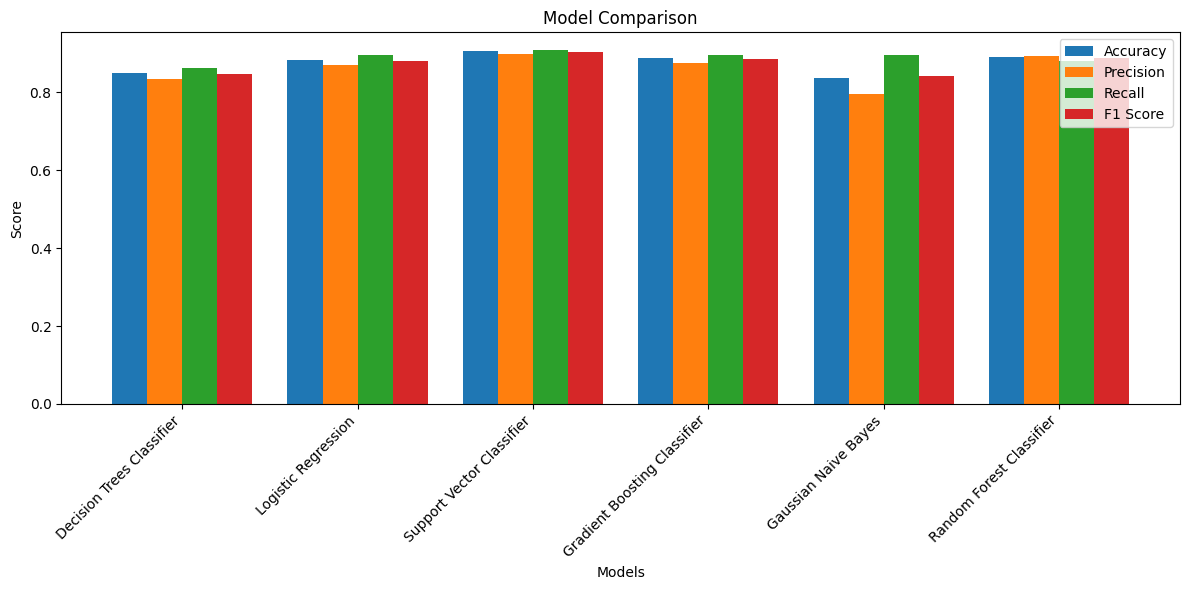

In [ ]:
import matplotlib.pyplot as plt

# Evaluation Metrics for each model (Replace with your actual values)
models = ["Decision Trees Classifier", "Logistic Regression", "Support Vector Classifier",
          "Gradient Boosting Classifier", "Gaussian Naive Bayes", "Random Forest Classifier"]
accuracy = [accuracy_dtc, accuracy_lr, accuracy_svc, accuracy_gbc,
            accuracy_gnb, accuracy_rfc]
precision = [precision_dtc, precision_lr, precision_svc, precision_gbc,
             precision_gnb, precision_rfc]
recall = [recall_dtc, recall_lr, recall_svc, recall_gbc,
          recall_gnb, recall_rfc]
f1_score = [f1_dtc, f1_lr, f1_svc, f1_gbc, f1_gnb, f1_rfc]

# Width of each bar
bar_width = 0.2

# X-axis positions for each set of bars
x_positions = range(len(models))

# Create Bar Plot
plt.figure(figsize=(12, 6))
plt.bar(x_positions, accuracy, width=bar_width, label='Accuracy')
plt.bar([pos + bar_width for pos in x_positions], precision, width=bar_width, label='Precision')
plt.bar([pos + 2 * bar_width for pos in x_positions], recall, width=bar_width, label='Recall')
plt.bar([pos + 3 * bar_width for pos in x_positions], f1_score, width=bar_width, label='F1 Score')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks([pos + 1.5 * bar_width for pos in x_positions], models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


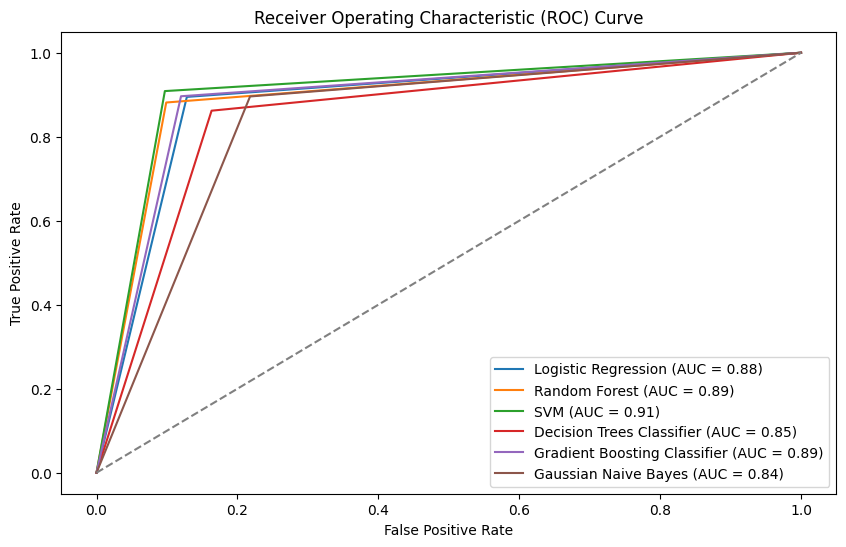

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC AUC score for each model (Replace with your actual values)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rfc)
roc_auc_rf = roc_auc_score(y_test, y_pred_rfc)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svc)
roc_auc_svm = roc_auc_score(y_test, y_pred_svc)

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_pred_dtc)
roc_auc_dtc = roc_auc_score(y_test, y_pred_dtc)

fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred_gbc)
roc_auc_gbc = roc_auc_score(y_test, y_pred_gbc)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb)
roc_auc_gnb = roc_auc_score(y_test, y_pred_gnb)

# Create ROC Curve Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Trees Classifier (AUC = {roc_auc_dtc:.2f})')
plt.plot(fpr_gbc, tpr_gbc, label=f'Gradient Boosting Classifier (AUC = {roc_auc_gbc:.2f})')
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


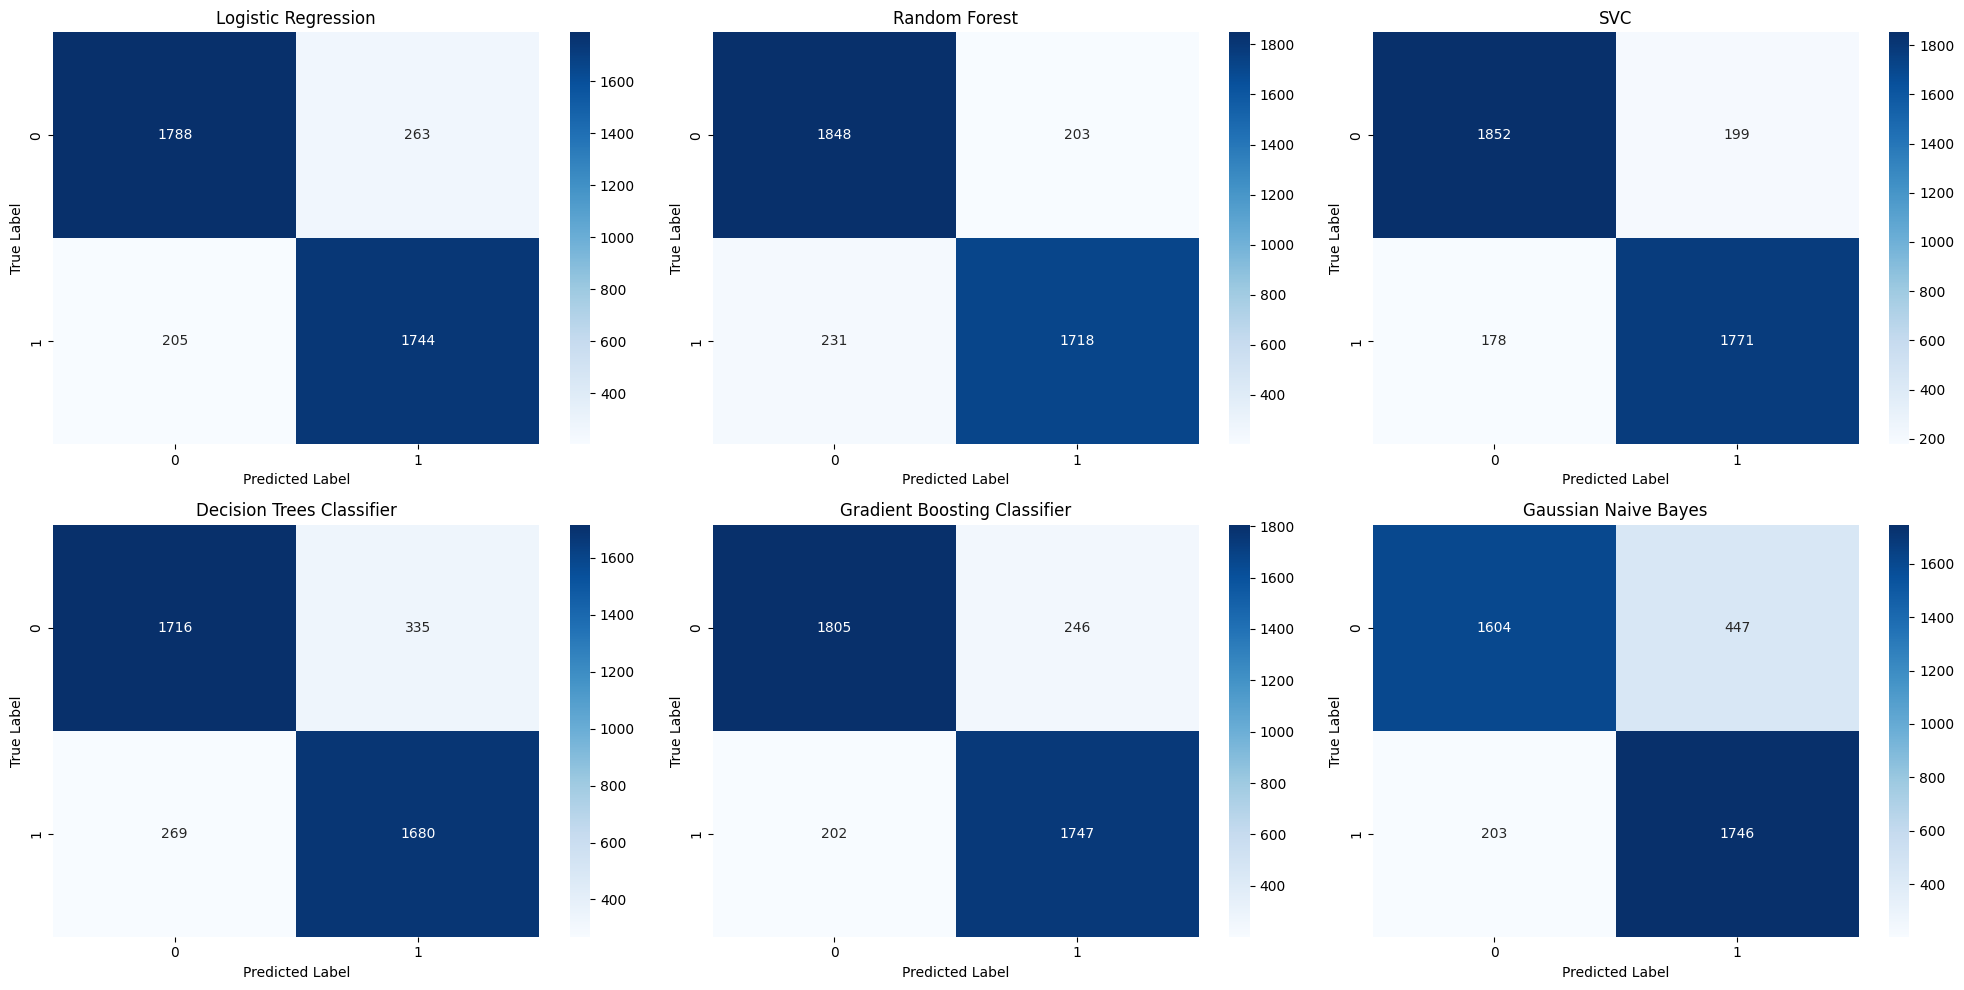

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for each model (Replace with your actual values)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rfc)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Create Confusion Matrix Heatmap
plt.figure(figsize=(20, 10))

plt.subplot(231)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(232)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(233)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title('SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(234)
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Trees Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(235)
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(236)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues')
plt.title('Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()
